<a href="https://colab.research.google.com/github/gchn24/DS-Notes/blob/main/05_Decision_Trees_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import pickle
# Load data (deserialize)
with open('/content/drive/MyDrive/Machine Learning/ML: Decision Trees-2/Shared/preprocessed_X_sm.pickle', 'rb') as handle:
    X_train = pickle.load(handle)

with open('/content/drive/MyDrive/Machine Learning/ML: Decision Trees-2/Shared/X_test.pickle', 'rb') as handle:
    X_test = pickle.load(handle)

with open('/content/drive/MyDrive/Machine Learning/ML: Decision Trees-2/Shared/y_sm.pickle', 'rb') as handle:
    y_train = pickle.load(handle)

with open('/content/drive/MyDrive/Machine Learning/ML: Decision Trees-2/Shared/y_test.pickle', 'rb') as handle:
    y_test = pickle.load(handle)

In [ ]:
X_train.head()

,Age,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,36,1174,3,4,0.233871,1,0,99,3,2,...,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,21,546,5,1,0.127479,3,1,97,3,1,...,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,43,422,1,3,0.151584,4,0,33,3,2,...,2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,42,188,29,3,0.127479,2,1,56,1,2,...,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,35,992,1,3,0.127479,4,1,68,2,1,...,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: Attrition, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_validate, cross_val_score

kfold = KFold(n_splits=10)

depths = [3,4,5,6,7,9,11,13,15]

for depth in depths:
    tree_clf = DecisionTreeClassifier(random_state=7, max_depth=depth)

    cv_acc_results = cross_validate(tree_clf, X_train, y_train, cv = kfold, scoring = 'accuracy', return_train_score = True)

    print(f"K-Fold for depth:{depth} Accuracy Mean: Train: {cv_acc_results['train_score'].mean()*100} Validation: {cv_acc_results['test_score'].mean()*100}")
    print(f"K-Fold for depth: {depth} Accuracy Std: Train: {cv_acc_results['train_score'].std()*100} Validation: {cv_acc_results['test_score'].std()*100}")
    print('***************')

K-Fold for depth:3 Accuracy Mean: Train: 78.23483177413387 Validation: 76.47326674500587
K-Fold for depth: 3 Accuracy Std: Train: 1.203088267164511 Validation: 11.331241420327677
***************
K-Fold for depth:4 Accuracy Mean: Train: 83.50772540936214 Validation: 80.58049353701529
K-Fold for depth: 4 Accuracy Std: Train: 0.7889219949763586 Validation: 6.337951865133366
***************
K-Fold for depth:5 Accuracy Mean: Train: 87.36180052847033 Validation: 81.88366627497062
K-Fold for depth: 5 Accuracy Std: Train: 0.7888615077334944 Validation: 7.73770036081666
***************
K-Fold for depth:6 Accuracy Mean: Train: 90.51833384407234 Validation: 84.58783783783784
K-Fold for depth: 6 Accuracy Std: Train: 0.9528667083694777 Validation: 7.804013667897827
***************
K-Fold for depth:7 Accuracy Mean: Train: 93.24203753064435 Validation: 84.20945945945945
K-Fold for depth: 7 Accuracy Std: Train: 0.8887486809601636 Validation: 8.453236055736403
***************
K-Fold for depth:9 Accurac

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=7, max_depth=6)
tree_clf=tree_clf.fit(X_train, y_train)
pred = tree_clf.predict(X_test)

In [ ]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(X_train.columns)

# Ensure the target variable 'Attrition' is not there in the feature list

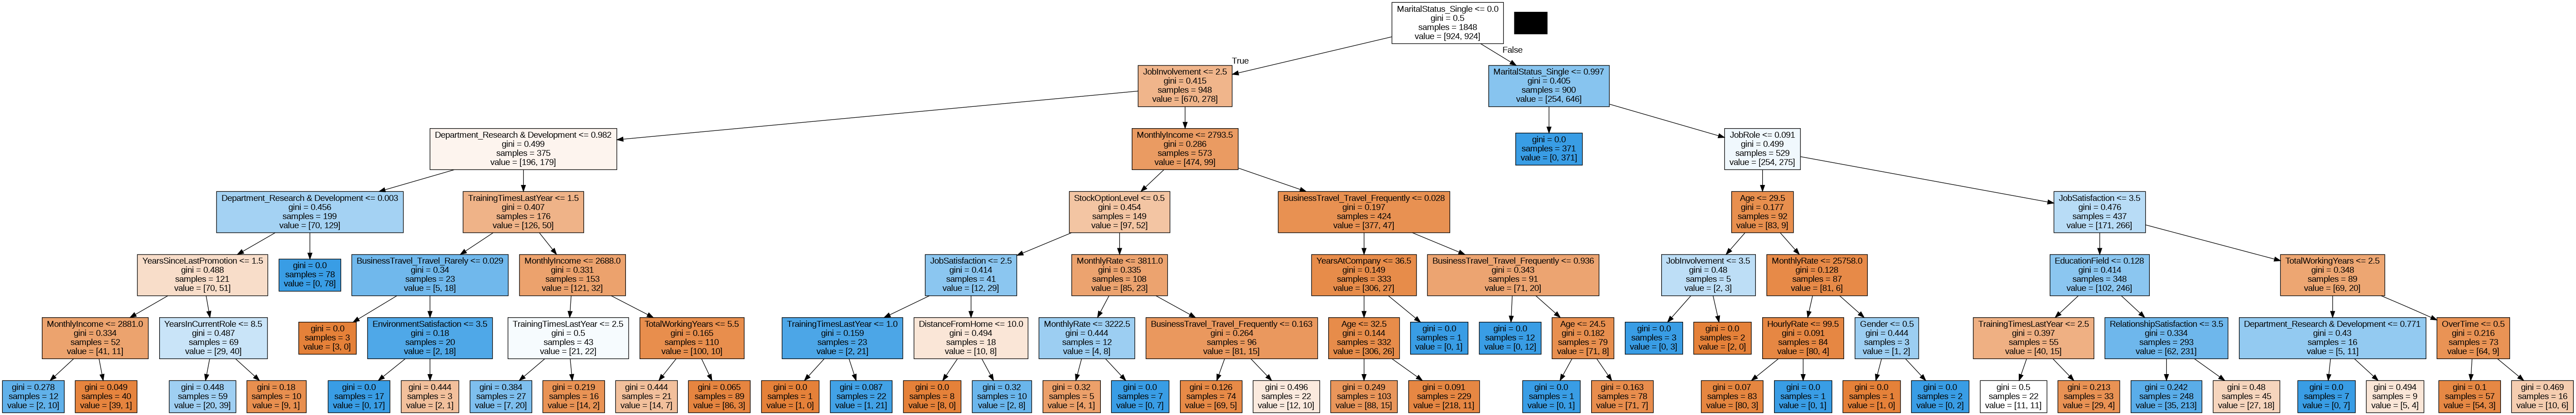

In [ ]:
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

Text(0.5, 23.52222222222222, 'Predicted label')

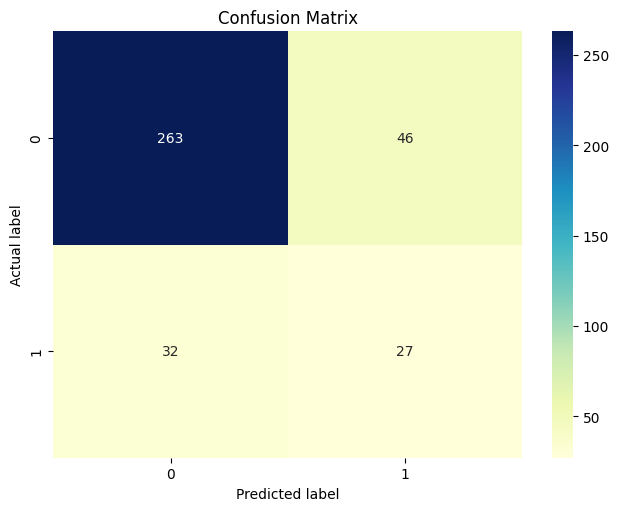

In [ ]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cnf_matrix = confusion_matrix(y_test, pred)
fig, ax = plt.subplots()

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Feature Importance

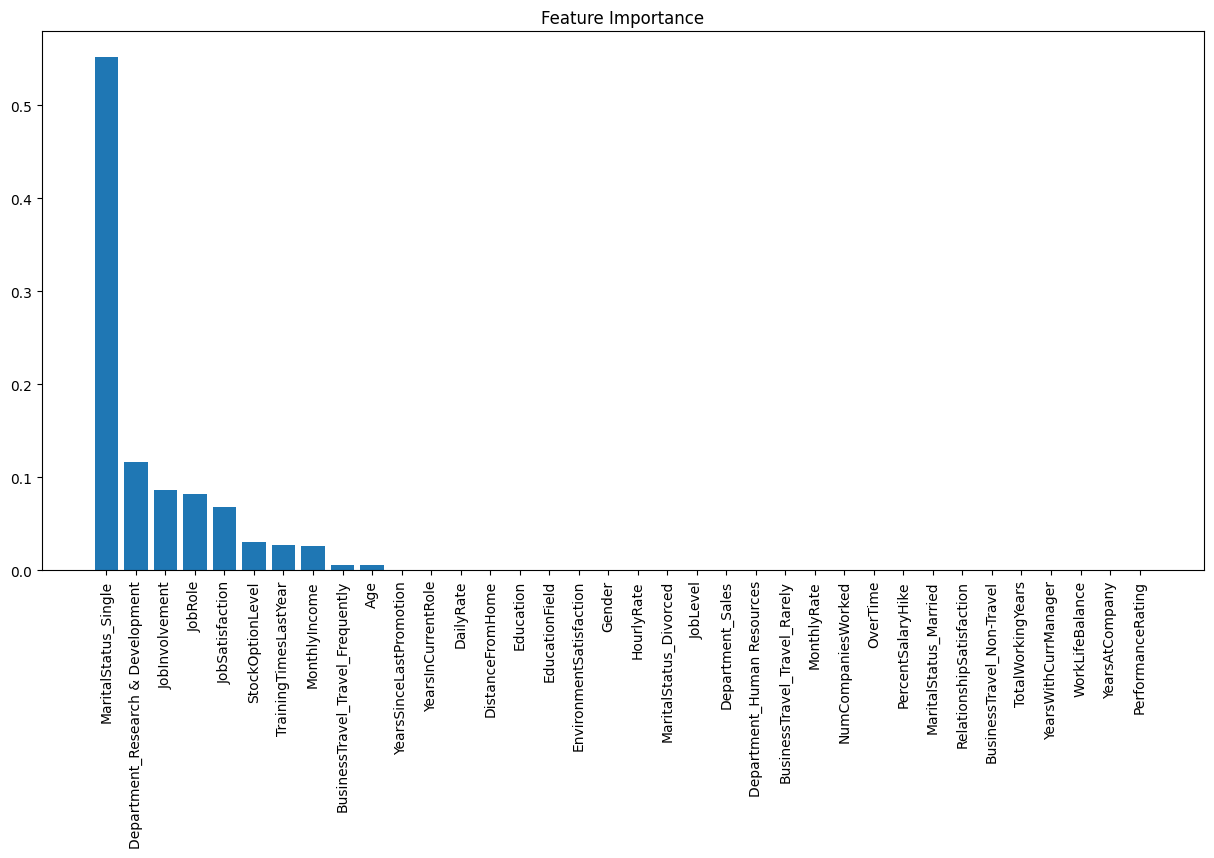

In [ ]:
importances = tree_clf.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances

plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

In [ ]:
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(len(list(X_train.columns))):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

,Feature,Coefficient
0,MaritalStatus_Single,0.551861
1,Department_Research & Development,0.116828
2,JobInvolvement,0.086921
3,JobRole,0.082005
4,JobSatisfaction,0.068126
5,StockOptionLevel,0.030027
6,TrainingTimesLastYear,0.027184
7,MonthlyIncome,0.025852
8,BusinessTravel_Travel_Frequently,0.005684
9,Age,0.005513


# Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_validate
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
!gdown 176WcJFfaSz3YkO1TiGEg_EqWgJ4YQEwO

Downloading...
From: https://drive.google.com/uc?id=176WcJFfaSz3YkO1TiGEg_EqWgJ4YQEwO
To: /content/regData.csv
100% 13.4k/13.4k [00:00<00:00, 66.6MB/s]


In [ ]:
regression_data = pd.read_csv('regData.csv')

In [ ]:
regression_data.head()

,X,Y
0,1,1.018138
1,2,0.813685
2,3,0.795484
3,4,0.860005
4,5,0.990648


In [ ]:
regression_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       600 non-null    int64  
 1   Y       600 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 9.5 KB


In [ ]:
X = regression_data['X']
y = regression_data['Y']

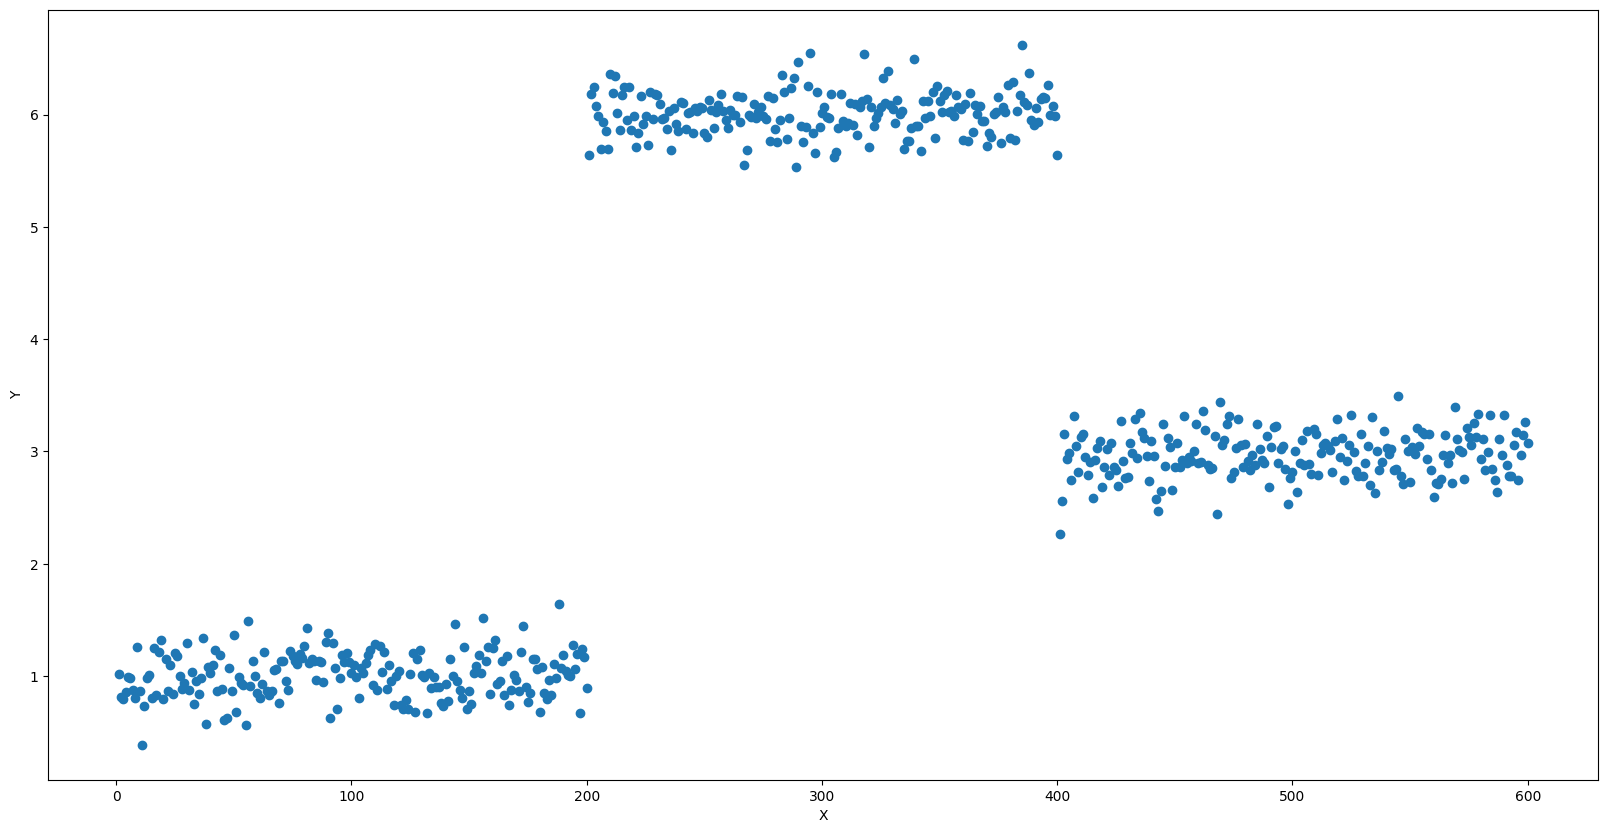

In [ ]:
plt.figure(figsize = (20,10))
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=43,
                                                    shuffle = True)

In [ ]:
X_train = X_train.values.reshape(-1,1)

In [ ]:
y_train = y_train.values

In [ ]:
depths = [1,2,3,5,6,7,9,11]

for depth in depths:
    tree_reg = DecisionTreeRegressor(random_state=7, max_depth = depth, min_samples_split = 10, min_samples_leaf = 20)

    kfold = KFold(n_splits=3)

    # scoring is taken as negative mse as we maximize the scoring. maximizing negative MSE is same as minimizing MSE.
    cv_acc_results = cross_validate(tree_reg, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error', return_train_score = True)

    print(f"K-Fold for depth:{depth} -ve MSE Mean: Train: {cv_acc_results['train_score'].mean()*100} Validation: {cv_acc_results['test_score'].mean()*100}")
    print('***************')

K-Fold for depth:1 -ve MSE Mean: Train: -157.29484407813618 Validation: -161.85220982964185
***************
K-Fold for depth:2 -ve MSE Mean: Train: -4.022779524301007 Validation: -13.41631105078697
***************
K-Fold for depth:3 -ve MSE Mean: Train: -3.889896491712604 Validation: -13.530023054703413
***************
K-Fold for depth:5 -ve MSE Mean: Train: -3.802910351858201 Validation: -13.515703625248829
***************
K-Fold for depth:6 -ve MSE Mean: Train: -3.802910351858201 Validation: -13.515703625248829
***************
K-Fold for depth:7 -ve MSE Mean: Train: -3.802910351858201 Validation: -13.515703625248829
***************
K-Fold for depth:9 -ve MSE Mean: Train: -3.802910351858201 Validation: -13.515703625248829
***************
K-Fold for depth:11 -ve MSE Mean: Train: -3.802910351858201 Validation: -13.515703625248829
***************


In [ ]:
features = list(regression_data.columns[0])

In [ ]:
tree_reg = DecisionTreeRegressor(random_state=7, max_depth = 2, min_samples_split = 20 )
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, min_samples_split=20, random_state=7)

In [ ]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

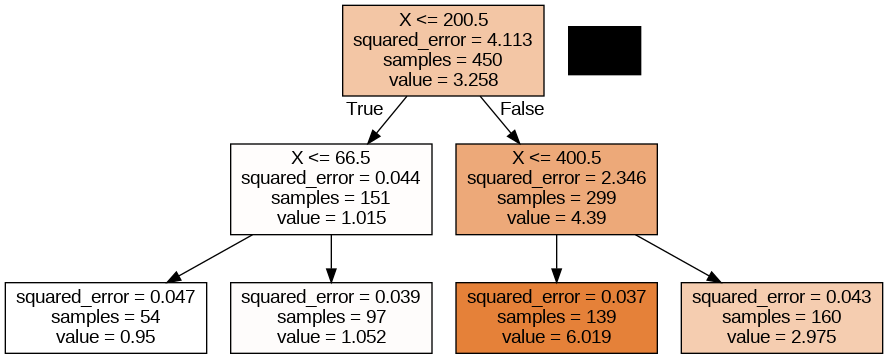

In [ ]:
dot_data = StringIO()
export_graphviz(tree_reg, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

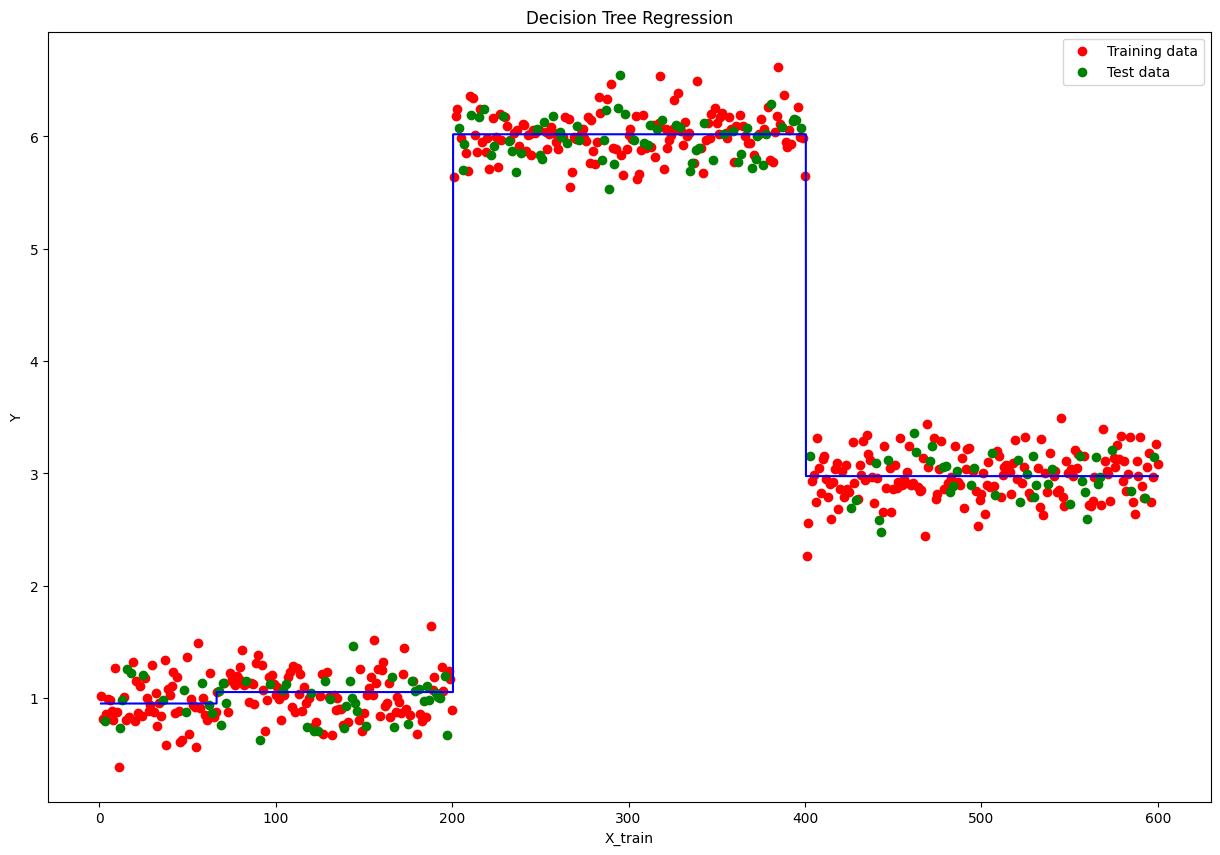

In [ ]:
X_grid = np.arange(min(X_train), max(X_train), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.figure(figsize = (15,10))
plt.scatter(X_train, y_train, color = 'red', label = 'Training data')
plt.scatter (X_test, y_test, color = 'green', label = 'Test data')
plt.plot(X_grid, tree_reg.predict(X_grid), color = 'blue')
plt.title('Decision Tree Regression')
plt.xlabel('X_train')
plt.ylabel('Y')
plt.legend()
plt.show()